In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('csv/최종_rawdata_레이블.csv', index_col=0)
list = pd.read_csv('csv/리스트.csv', index_col=0)
list

,Symbol,Name,회계년
3719,A298380,에이비엘바이오,2022
6964,A028080,휴맥스홀딩스,2019
3425,A293780,압타바이오,2020
6963,A028080,휴맥스홀딩스,2018
3426,A293780,압타바이오,2021
...,...,...,...
5462,A284620,카이노스메드,2018
5463,A284620,카이노스메드,2019
5839,A115180,큐리언트,2020
5464,A284620,카이노스메드,2020


In [11]:
df = pd.merge(list, data, on=['Symbol','Name','회계년'], how='left')
df

,Symbol,Name,회계년,영업이익(천원),이자비용(비영업)(천원),이자보상배율,레이블,label,label_shifted
0,A298380,에이비엘바이오,2022,907999.0,1325978.0,0.684777,부실징후,0,0.0
1,A028080,휴맥스홀딩스,2019,1033238.0,580379.0,1.780282,부실징후,0,0.0
2,A293780,압타바이오,2020,-6064788.0,2295.0,-2642.609150,부실징후,0,0.0
3,A028080,휴맥스홀딩스,2018,-15081877.0,959713.0,-15.714987,부실징후,0,0.0
4,A293780,압타바이오,2021,-11366985.0,1832.0,-6204.686135,부실징후,0,0.0
...,...,...,...,...,...,...,...,...,...
6985,A284620,카이노스메드,2018,-7634006.0,2566.0,-2975.060795,부실징후,0,0.0
6986,A284620,카이노스메드,2019,-8087227.0,8127.0,-995.106066,부실징후,0,0.0
6987,A115180,큐리언트,2020,-21024930.0,381.0,-55183.543307,부실징후,0,0.0
6988,A284620,카이노스메드,2020,-9385681.0,763411.0,-12.294401,부실징후,0,0.0


In [13]:
df['label_shifted'].value_counts()

label_shifted
0.0    6024
1.0     966
Name: count, dtype: int64

In [28]:
result = []

for i in range(2011, 2024) :
    # print(i)
    # print(len(df.loc[(df['회계년'] == i) & (df['label_shifted'] == 0.0)]))
    count_0 = len(df.loc[(df['회계년'] == i) & (df['label_shifted'] == 0.0)])
    count_1 = len(df.loc[(df['회계년'] == i) & (df['label_shifted'] == 1.0)])
    result.append((i, count_0, count_1))

results_df = pd.DataFrame(result, columns=['Year', 'Count_0', 'Count_1'])
results_df

,Year,Count_0,Count_1
0,2011,283,44
1,2012,388,77
2,2013,422,78
3,2014,399,108
4,2015,398,101
5,2016,430,72
6,2017,504,64
7,2018,544,80
8,2019,593,113
9,2020,623,140


In [57]:
results_df['sum'] = results_df['Count_0'] + results_df['Count_1']
results_df

,Year,Count_0,Count_1,Total,Ratio_0,Ratio_1,sum
0,2011,283,44,327,0.865443,0.134557,327
1,2012,388,77,465,0.834409,0.165591,465
2,2013,422,78,500,0.844000,0.156000,500
3,2014,399,108,507,0.786982,0.213018,507
4,2015,398,101,499,0.797595,0.202405,499
5,2016,430,72,502,0.856574,0.143426,502
6,2017,504,64,568,0.887324,0.112676,568
7,2018,544,80,624,0.871795,0.128205,624
8,2019,593,113,706,0.839943,0.160057,706
9,2020,623,140,763,0.816514,0.183486,763


In [59]:
(763+743+786) / 6990

0.3278969957081545

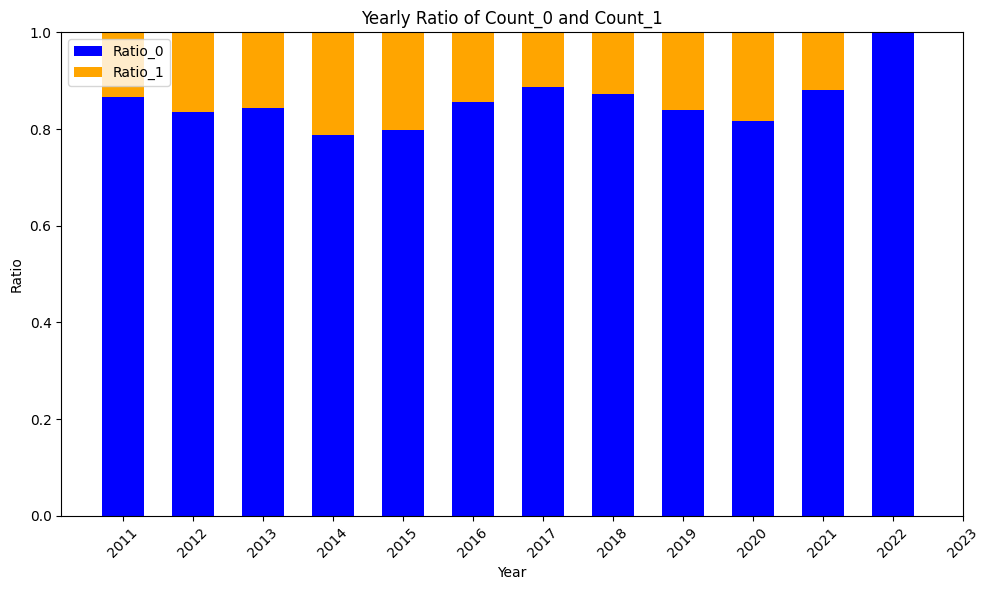

In [29]:
results_df['Total'] = results_df['Count_0'] + results_df['Count_1']
results_df['Ratio_0'] = results_df['Count_0'] / results_df['Total']
results_df['Ratio_1'] = results_df['Count_1'] / results_df['Total']

fig, ax = plt.subplots(figsize=(10, 6))

# 막대그래프를 쌓은 형태로 그리기
bar_width = 0.6
ax.bar(results_df['Year'], results_df['Ratio_0'], bar_width, label='Ratio_0', color='blue')
ax.bar(results_df['Year'], results_df['Ratio_1'], bar_width, bottom=results_df['Ratio_0'], label='Ratio_1', color='orange')

# 그래프 제목과 축 레이블 설정
ax.set_title('Yearly Ratio of Count_0 and Count_1')
ax.set_xlabel('Year')
ax.set_ylabel('Ratio')
ax.set_xticks(results_df['Year'])
ax.set_xticklabels(results_df['Year'], rotation=45)

# 범례 추가
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

In [48]:
from matplotlib import rc
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

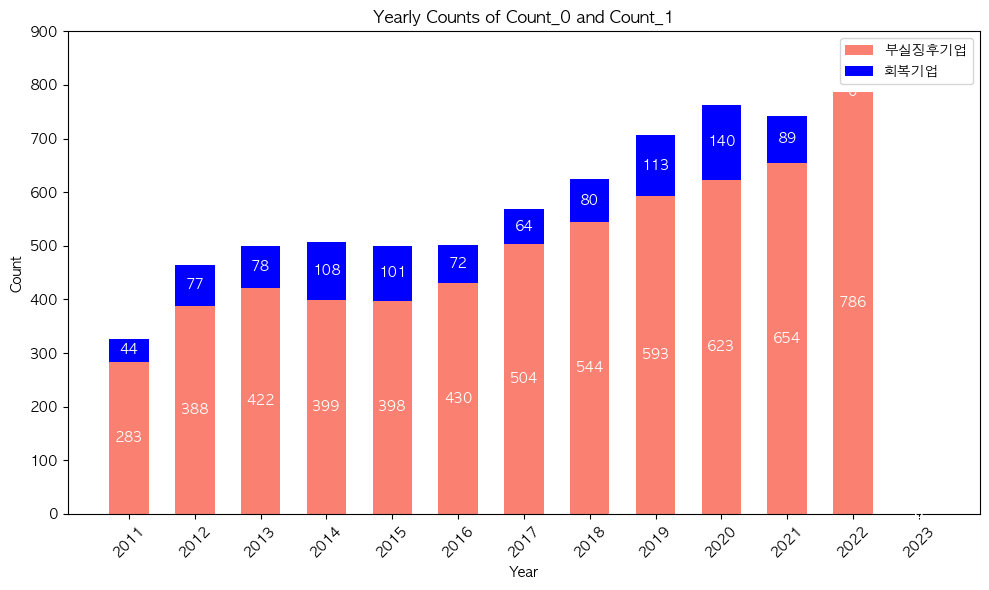

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

# 막대그래프를 쌓은 형태로 그리기
bar_width = 0.6
bars1 = ax.bar(results_df['Year'], results_df['Count_0'], bar_width, label='부실징후기업', color='salmon')
bars2 = ax.bar(results_df['Year'], results_df['Count_1'], bar_width, bottom=results_df['Count_0'], label='회복기업', color='blue')

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, int(yval), ha='center', va='center', color='white')

for bar in bars2:
    yval = bar.get_height() + bar.get_y()
    ax.text(bar.get_x() + bar.get_width() / 2, yval - bar.get_height() / 2, int(bar.get_height()), ha='center', va='center', color='white')

# 그래프 제목과 축 레이블 설정
ax.set_title('Yearly Counts of Count_0 and Count_1')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_xticks(results_df['Year'])
ax.set_xticklabels(results_df['Year'], rotation=45)

ax.set_ylim(0, 900)

# 범례 추가
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

In [56]:
for i in range(2020,2023):
    print(df['회계년'] == i)


0       False
1       False
2        True
3       False
4       False
        ...  
6985    False
6986    False
6987     True
6988     True
6989    False
Name: 회계년, Length: 6990, dtype: bool
0       False
1       False
2       False
3       False
4        True
        ...  
6985    False
6986    False
6987    False
6988    False
6989    False
Name: 회계년, Length: 6990, dtype: bool
0        True
1       False
2       False
3       False
4       False
        ...  
6985    False
6986    False
6987    False
6988    False
6989    False
Name: 회계년, Length: 6990, dtype: bool


In [ ]:
df

In [20]:
for i in range(2011, 2024) :
    print(i)
    print(len(df.loc[(df['회계년'] == i) & (df['label_shifted'] == 1.0)]))

2011
44
2012
77
2013
78
2014
108
2015
101
2016
72
2017
64
2018
80
2019
113
2020
140
2021
89
2022
0
2023
0


In [21]:
df.to_csv('csv/최종_label(완성본)2.csv', encoding='utf-8-sig')

In [ ]:
plt.bar(df_group.index, df_group['Group 1'])
plt.bar(df_group.index, df_group['Group 2'], bottom=df_group['Group 1'])
출처: https://coduking.tistory.com/entry/Matplotlib-막대-그래프-그리는-7가지-방법errorbar-100-누적-바-등 [코딩에듀킹:티스토리]